In [1]:
import os
print(os.getcwd())
os.chdir('../')
print(os.getcwd())

/Users/riley/Desktop/RAFTS/Notebooks
/Users/riley/Desktop/RAFTS


In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import astropy.units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
from astropy.visualization import astropy_mpl_style

from utils import *

In [65]:
dcdf = pd.read_csv('ddf_flares.csv', index_col=0)
dcdf.head()

,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass,parallactic angle
0,COSMOS,DC21jyeo,1244336,148.627940,1.020521,59360.983202,g,21.359,0.084,0.956,1107,1.116,1.24,151.108934
1,COSMOS,DC21jyeo,1244619,148.628248,1.020494,59360.984455,g,21.596,0.110,0.612,1108,1.115,1.24,150.563735
2,COSMOS,DC21jvtr,1231065,148.394095,1.407216,59358.011504,g,18.943,0.009,1.000,1059,1.169,1.31,143.250519
3,COSMOS,DC21jvtr,1232660,148.394358,1.407301,59358.012786,g,18.932,0.010,0.998,1060,1.185,1.31,142.810031
4,COSMOS,DC21jvtr,1233917,148.394618,1.407363,59358.014054,r,18.440,0.005,1.000,1061,0.985,1.32,142.380997


In [66]:
dcdf.shape

(5668, 14)

In [67]:
#Are all object IDs unique?
dcdf.shape[0] == dcdf['object id'].unique().shape[0]

True

In [68]:
#What fields are included?
dcdf['field'].unique()

array(['COSMOS', 'ELAIS'], dtype=object)

In [69]:
from IPython.display import display

for id in dcdf['candidate id'].unique()[0:5]:
    display(dcdf[dcdf['candidate id'] == id])

,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass,parallactic angle
0,COSMOS,DC21jyeo,1244336,148.627940,1.020521,59360.983202,g,21.359,0.084,0.956,1107,1.116,1.24,151.108934
1,COSMOS,DC21jyeo,1244619,148.628248,1.020494,59360.984455,g,21.596,0.110,0.612,1108,1.115,1.24,150.563735


,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass,parallactic angle
2,COSMOS,DC21jvtr,1231065,148.394095,1.407216,59358.011504,g,18.943,0.009,1.000,1059,1.169,1.31,143.250519
3,COSMOS,DC21jvtr,1232660,148.394358,1.407301,59358.012786,g,18.932,0.010,0.998,1060,1.185,1.31,142.810031
4,COSMOS,DC21jvtr,1233917,148.394618,1.407363,59358.014054,r,18.440,0.005,1.000,1061,0.985,1.32,142.380997


,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass,parallactic angle
5,COSMOS,DC21bcfau,3089222,148.467440,1.392566,59369.995322,g,21.713,0.034,1.0,1421,0.946,1.38,138.092227
6,COSMOS,DC21bcfau,3089081,148.467843,1.392517,59369.996585,g,21.710,0.032,1.0,1422,0.917,1.39,137.736897
7,COSMOS,DC21bcfau,3094437,148.468223,1.392466,59369.997844,r,21.053,0.029,1.0,1423,0.934,1.40,137.388350


,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass,parallactic angle
8,COSMOS,DC21fmml,10047388,148.914762,0.793344,59319.041709,i,21.204,0.037,1.0,2004,0.986,1.18,-177.819290
9,COSMOS,DC21fmml,587061,148.915011,0.793717,59319.051927,g,21.809,0.035,1.0,479,1.004,1.18,175.990510
10,COSMOS,DC21fmml,578186,148.915040,0.793784,59319.052961,r,21.278,0.024,1.0,480,0.879,1.18,175.367113
11,COSMOS,DC21fmml,583338,148.915315,0.794233,59319.064989,g,21.875,0.042,1.0,489,1.151,1.18,168.254825


,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass,parallactic angle
12,COSMOS,DC21jrzg,1210241,148.952954,0.800502,59355.987286,g,21.120,0.060,0.872,1038,1.261,1.22,155.817126
13,COSMOS,DC21jrzg,1212223,148.953180,0.800468,59355.988541,g,21.156,0.061,0.909,1039,1.219,1.22,155.209016


Check how many COSMOS g-band objects per candidate:

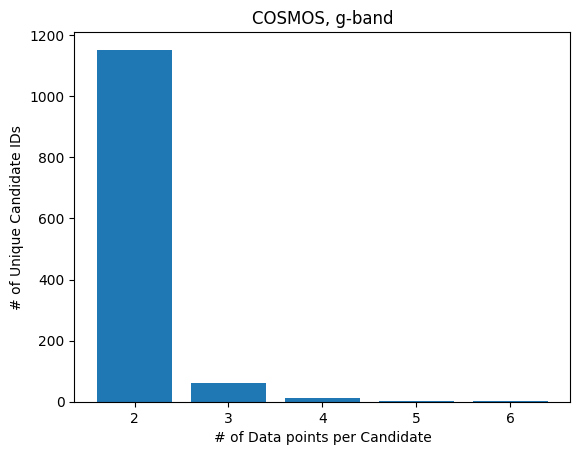

In [70]:
h = []

for i, id in enumerate(dcdf[dcdf['field'] == 'COSMOS']['candidate id'].unique()):
    h.append(len(dcdf[(dcdf['candidate id'] == id) & (dcdf['object filter'] == 'g')]))

labels, counts = np.unique(h, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('COSMOS, g-band')
plt.xlabel('# of Data points per Candidate')
plt.ylabel('# of Unique Candidate IDs');

Visualize flare coordinates

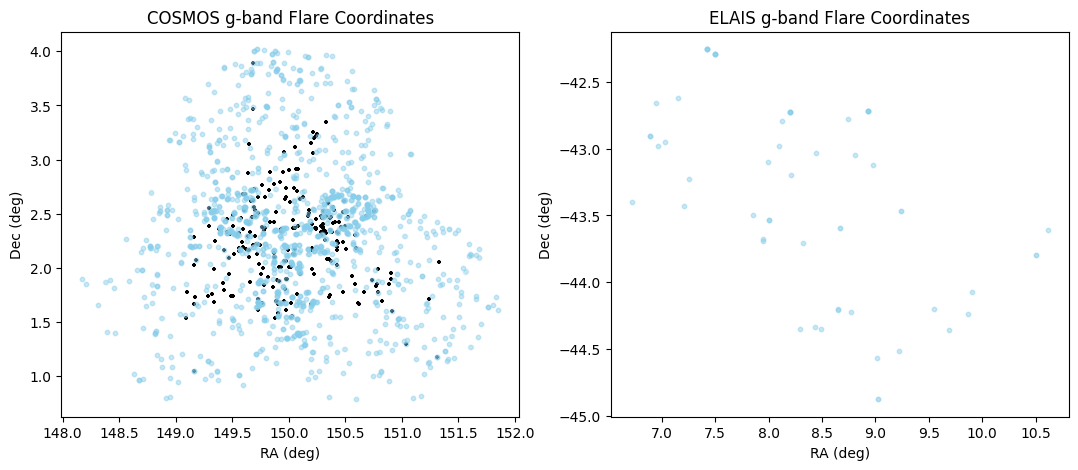

In [71]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

ra1 = dcdf[(dcdf['field'] == 'COSMOS') & (dcdf['object filter'] == 'g')]['object ra']
dec1 = dcdf[(dcdf['field'] == 'COSMOS') & (dcdf['object filter'] == 'g')]['object dec']

ra2 = dcdf[(dcdf['field'] == 'ELAIS') & (dcdf['object filter'] == 'g')]['object ra']
dec2 = dcdf[(dcdf['field'] == 'ELAIS') & (dcdf['object filter'] == 'g')]['object dec']


for id in dcdf[(dcdf['field']=='COSMOS') & (dcdf['object filter']=='g')]['exposure id'].unique():
    med_ra = dcdf[dcdf['exposure id'] == id]['object ra'].median()
    med_dec = dcdf[dcdf['exposure id'] == id]['object dec'].median()
    ax[0].scatter(med_ra, med_dec, s=10, c = 'k', marker='+')

ax[0].scatter(ra1, dec1, c='skyblue', alpha=0.25, s=10)
ax[0].set_xlabel('RA (deg)')
ax[0].set_ylabel('Dec (deg)')
ax[0].set_title('COSMOS g-band Flare Coordinates');

ax[1].scatter(ra2, dec2, c='skyblue', alpha=0.25, s=10)
ax[1].set_xlabel('RA (deg)')
ax[1].set_ylabel('Dec (deg)')
ax[1].set_title('ELAIS g-band Flare Coordinates');
plt.savefig('Figures/decam_coords.png', dpi=300, bbox_inches='tight')

^^^ color by DCR amplitude ?

Visual real-bogus scores in each field

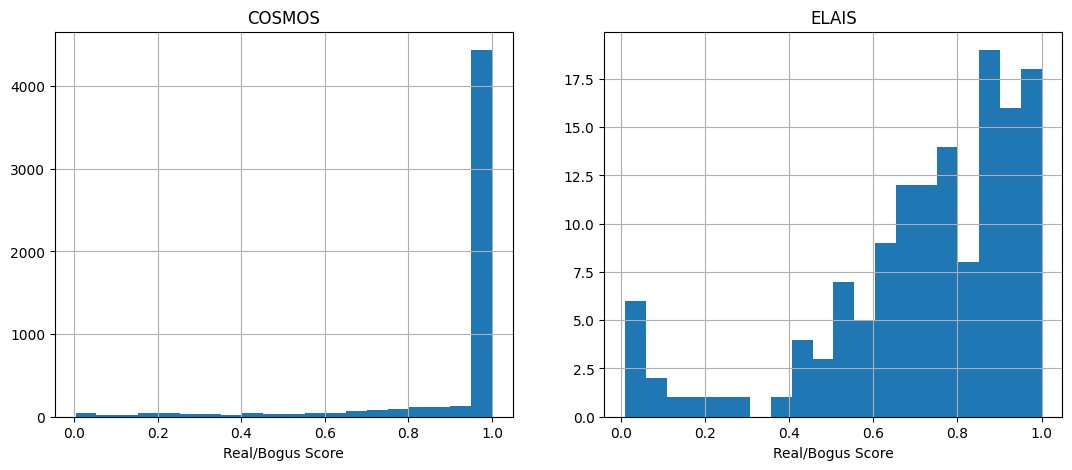

In [72]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

dcdf[dcdf['field'] == 'COSMOS']['object real/bogus score'].hist(bins=20, ax=ax[0])
ax[0].set_xlabel('Real/Bogus Score')
ax[0].set_title('COSMOS')


dcdf[dcdf['field'] == 'ELAIS']['object real/bogus score'].hist(bins=20, ax=ax[1])
ax[1].set_xlabel('Real/Bogus Score')
ax[1].set_title('ELAIS')
plt.savefig('Figures/rbdist.png', dpi=300, bbox_inches='tight')

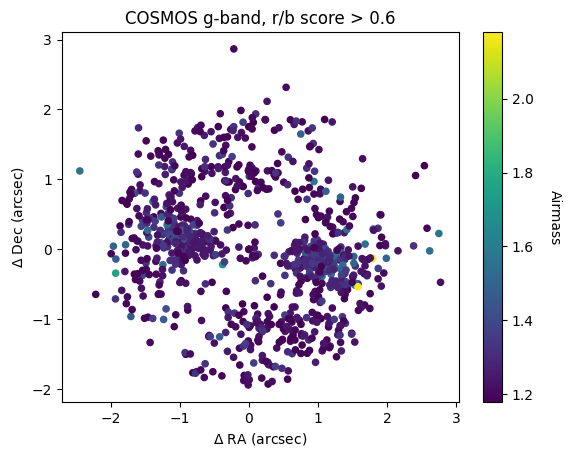

In [73]:
def dcoord(dcdf, field, thr, filt):

        d_ra = np.zeros_like(dcdf[dcdf['field'] == field]['candidate id'].unique())
        d_dec = np.zeros_like(dcdf[dcdf['field'] == field]['candidate id'].unique())
        d_am = np.zeros_like(dcdf[dcdf['field'] == field]['candidate id'].unique())
        
        for i,id in enumerate(dcdf[dcdf['field'] == field]['candidate id'].unique()):
                #print('Candidate ID: {}'.format(id))

                if np.isnan(dcdf.iloc[i]['airmass']):
                        continue

                subdf = dcdf[(dcdf['field'] == field) & (dcdf['object filter'] == filt) & 
                             (dcdf['object real/bogus score'] > thr) & (dcdf['candidate id'] == id)]

                if subdf.shape[0] == 2:

                        ra_i = subdf[subdf['object magnitude'] == subdf['object magnitude'].min()]['object ra'].values
                        dec_i = subdf[subdf['object magnitude'] == subdf['object magnitude'].min()]['object dec'].values
                        ra_f = subdf[subdf['object magnitude'] == subdf['object magnitude'].max()]['object ra'].values
                        dec_f = subdf[subdf['object magnitude'] == subdf['object magnitude'].max()]['object dec'].values
                        am_i = subdf[subdf['object magnitude'] == subdf['object magnitude'].min()]['airmass'].values
                        am_f = subdf[subdf['object magnitude'] == subdf['object magnitude'].max()]['airmass'].values
                     
                        dra = ra_f - ra_i
                        ddec = dec_f - dec_i

                        if dra.size > 0:
                                d_ra[i] = dra[0]

                        if ddec.size > 0:
                                d_dec[i] = ddec[0]

                        d_am[i] = np.mean([am_f, am_i])


                else:
                        d_ra[i] = np.nan
                        d_dec[i] = np.nan
                        d_am[i] = np.nan

        fig = plt.figure()
        ax = plt.axes()
        s = ax.scatter(d_ra*3600, d_dec*3600, c=d_am, s=20)
        ax.set_xlabel(r'$\Delta$ RA (arcsec)')
        ax.set_ylabel(r'$\Delta$ Dec (arcsec)')
        ax.set_title('{0} {1}-band, r/b score > {2}'.format(field,filt,thr))
        cbar = fig.colorbar(s)
        cbar.set_label('Airmass', rotation=270, labelpad=20)
        fig.savefig('Figures/{0}_rb{1}_deltacoord.png'.format(field, thr), dpi=300, bbox_inches='tight')
        return ax

_ = dcoord(dcdf, 'COSMOS', 0.6, 'g')

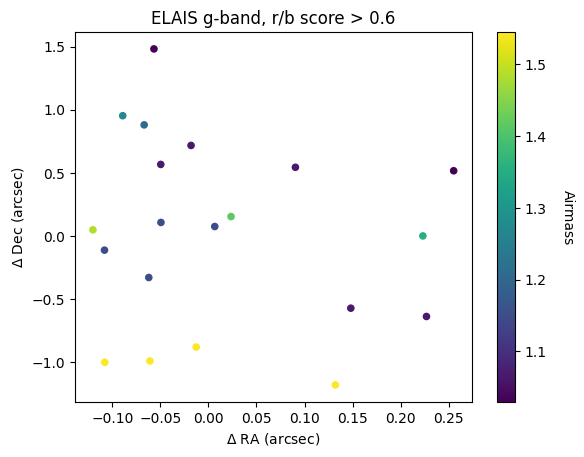

In [74]:
_ = dcoord(dcdf, 'ELAIS', 0.6, 'g')

Delta-magnitude histogram:

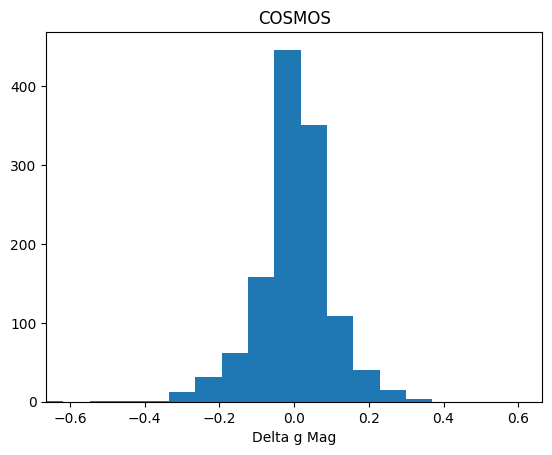

In [75]:
def dmag_hist(field, band, bins):

    h = []

    for i,id in enumerate(dcdf[dcdf['field'] == field]['candidate id'].unique()):

        subdf = dcdf[(dcdf['object filter'] == band) & (dcdf['candidate id'] == id)]

        if subdf.shape[0] > 1:
            
            h.append(subdf[subdf['object MJD'] == subdf['object MJD'].max()]['object magnitude'].values[0] - 
                    subdf[subdf['object MJD'] == subdf['object MJD'].min()]['object magnitude'].values[0])
    h = np.array(h)
    plt.hist(h, bins=bins);
    plt.xlim(-5*h.std(),5*h.std())
    plt.xlabel('Delta {} Mag'.format(band))
    plt.title(field)
    return h

h = dmag_hist('COSMOS', 'g', bins=50)


Delta-magnitude vs delta-time plot

257


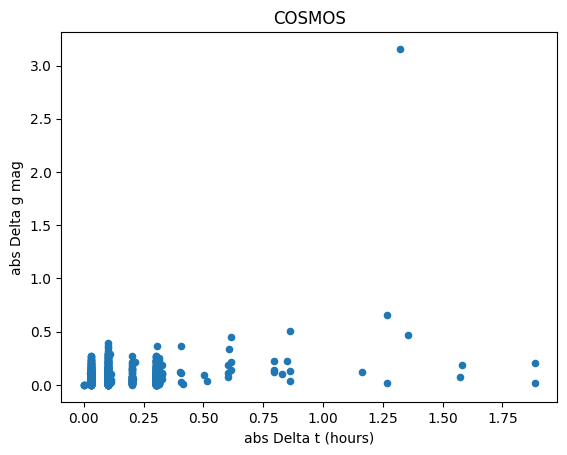

In [76]:
def dmag_plot(field, band):

    dmag = []
    dtime = []

    for i,id in enumerate(dcdf[dcdf['field'] == field]['candidate id'].unique()):

        subdf = dcdf[(dcdf['object filter'] == band) & (dcdf['candidate id'] == id)]

        if subdf.shape[0] > 1:
            
            dtime.append(subdf[subdf['object magnitude'] == subdf['object magnitude'].max()]['object MJD'].values[0] - 
                    subdf[subdf['object magnitude'] == subdf['object magnitude'].min()]['object MJD'].values[0])

            dmag.append(subdf['object magnitude'].max() - subdf['object magnitude'].min())
            
    dmag = np.array(np.abs(dmag))
    dtime = np.array(np.abs(dtime) * 24)
    
    print(np.where(dmag == dmag.max())[0][0])

    plt.scatter(dtime, dmag, s=20);
    #plt.ylim(0.5,-3.5)
    plt.ylabel('abs Delta {} mag'.format(band))
    plt.xlabel('abs Delta t (hours)')
    plt.title(field)
    return dmag, dtime
dmag, dtime = dmag_plot('COSMOS', 'g');

Lightcurve plot:

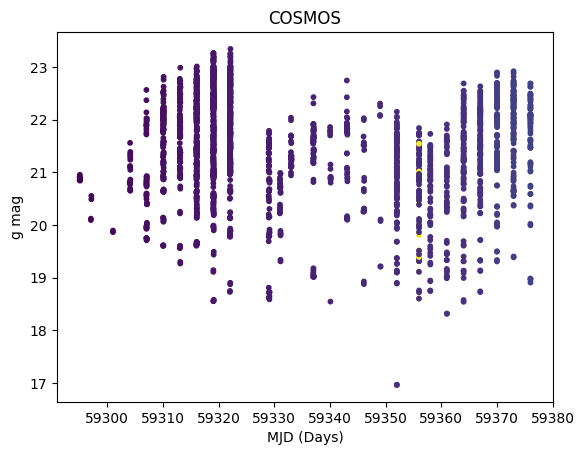

In [77]:
def dc_lcv(df, field, filt, rb_thr):  
    
    plt.scatter(df[(df['field']==field) & (df['object filter']==filt) & (df['object MJD'] < 59400)]['object MJD'].values, 
                df[(df['field']=='COSMOS') & (df['object filter']=='g') & (df['object MJD'] < 59400)]['object magnitude'].values, 
                c = df[(df['field']=='COSMOS') & (df['object filter']=='g') & (df['object MJD'] < 59400)]['exposure id'], s=10)
    plt.ylabel('{} mag'.format(filt))
   
    plt.xlabel('MJD (Days)')
    
    plt.title('{}'.format(field))

dc_lcv(dcdf, 'COSMOS', 'g', 0.6)

^^ bin into indiv exposures, find median ra dec in each time bin, assign subfield ID

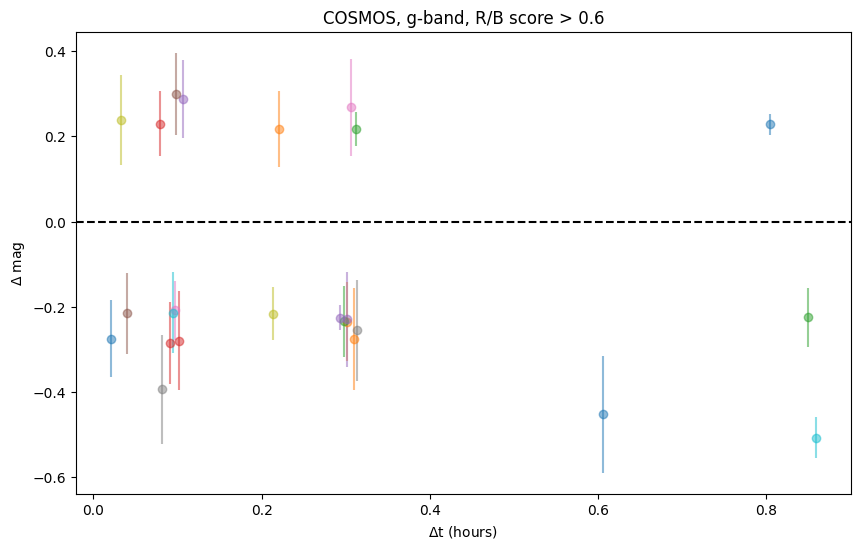

In [79]:
import warnings
warnings.filterwarnings("ignore")

def dmdt(df, field, rb_thr, filt):

        plt.figure(figsize=(10,6))
        
        for id in df[df['field'] == field]['candidate id'].unique():

                subdf = df[(df['field'] == field) & (df['object filter'] == filt) & 
                             (df['object real/bogus score'] > rb_thr) & (df['candidate id'] == id)]

                if subdf.shape[0] > 1:
                        dmag = np.sqrt((subdf['object magnitude error'].values[1:]) ** 2 
                                     + (subdf['object magnitude error'].values[:-1]) ** 2)

                        mdiff = np.diff(subdf['object magnitude'])
                        indx = ((np.abs(mdiff) - 2 * dmag) < 0) | (np.abs(mdiff) < 0.2)
                        mdiff[indx] = np.nan
                        tdiff = np.diff(subdf['object MJD']) * 24 + np.random.normal(0.0, 0.01, 
                                np.diff(subdf['object MJD']).shape)

                        if not np.isnan(mdiff).all():
                                plt.errorbar(tdiff, mdiff, yerr=dmag, marker='o', ls='none', alpha=0.5, label=id)

        plt.axhline(0, color='k', ls='--')
        #plt.xlim(0,0.4)
        plt.xlabel(r'$\Delta$t (hours)')
        plt.ylabel(r'$\Delta$ mag')
        plt.title('{0}, {1}-band, R/B score > {2}'.format(field, filt, rb_thr))
        #plt.legend(fontsize=8)
        plt.savefig('Figures/dmdt.png', dpi=300, bbox_inches='tight')

dmdt(dcdf, 'COSMOS', 0.6, 'g');

In [80]:
def scatter_hist(x, y, c, ax, ax_histx, ax_histy, ax_cbar):
        # no labels
        ax_histx.tick_params(axis="x", labelbottom=False)
        ax_histy.tick_params(axis="y", labelleft=False)

        # the scatter plot:
        s = ax.scatter(x, y, c=c, cmap='coolwarm', clim=[-0.15,0.15], alpha=0.75)

        # now determine nice limits by hand:
        xbinwidth = np.nanstd(x) * 0.5
        ybinwidth = np.nanstd(y) * 0.5
        xmax = np.nanmax(np.abs(x))
        ymax = np.nanmax(np.abs(y))
        xlim = (int(xmax/xbinwidth) + 1) * xbinwidth
        ylim = (int(ymax/ybinwidth) + 1) * ybinwidth

        xbins = np.arange(-xlim, xlim + xbinwidth, xbinwidth)
        ybins = np.arange(-ylim, ylim + ybinwidth, ybinwidth)
        ax_histx.hist(x, bins=xbins)
        ax_histy.hist(y, bins=ybins, orientation='horizontal')

        cbar = fig.colorbar(s, cax=ax_cbar)
        cbar.set_label(r'$\Delta$ Airmass', rotation=270, labelpad=20)

0.6726626288925854 2.0157207932818904


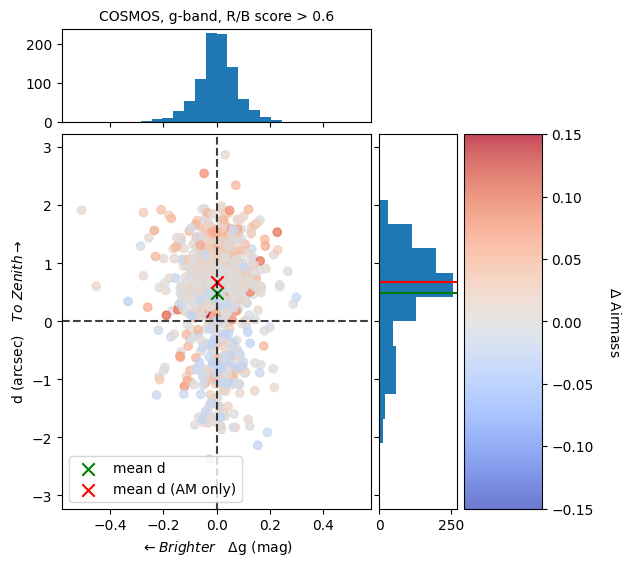

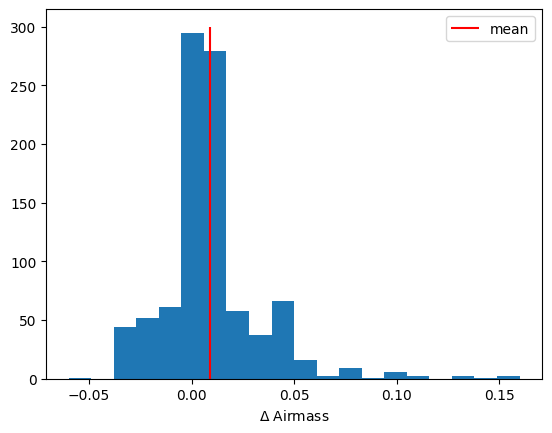

In [81]:
def dmdx(df, field, rb_thr, filt):
        #define gridspec
        fig = plt.figure(figsize=(6,6))
        gs = fig.add_gridspec(2, 3,  width_ratios=(4,1,1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
        #define axes
        ax = fig.add_subplot(gs[1, 0])
        ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
        ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
        ax_cbar = fig.add_subplot(gs[1, 2])

        d_arr = []
        dam_arr = []
        mdiff_arr = []
        am_only_shifts = []

        w_eff_sun = lamb_eff_BB(band='g', temp=40000.0) #solar temp BB
    
        #loop through unique ids with right field, filter, rb threshold
        for id in df[df['field'] == field]['candidate id'].unique():

                subdf = df[(df['field'] == field) & (df['object filter'] == filt) & 
                           (df['object real/bogus score'] > rb_thr) & (df['candidate id'] == id)]

                if (subdf.shape[0] < 3) * (subdf.shape[0] > 0):

                        mdiff = np.diff(subdf['object magnitude'])
                        mdiff_arr.append(mdiff)
                        pa2 = subdf['parallactic angle'].values[-1]
                        dra = np.diff(subdf['object ra'])
                        ddec = np.diff(subdf['object dec'])
                        dam = np.diff(subdf['airmass'])

                        # d = scalar projection along PA
                        d = np.sqrt(dra**2 + ddec**2) * np.cos((np.pi/2) - np.deg2rad(pa2) - np.arctan(ddec/dra)) 
                        d_arr.append(d)
                        dam_arr.append(dam)
                     
                        am_only_shift = dcr_offset(w_eff_sun, airmass = subdf['airmass'].values[-1]) - dcr_offset(w_eff_sun, airmass = subdf['airmass'].values[0])
                        am_only_shifts.append(am_only_shift)


        d_arr = np.concatenate(d_arr)
        dam_arr = np.concatenate(dam_arr)
        mdiff_arr = np.concatenate(mdiff_arr)
        
        #send arrays and axes to scatter_hist func
        scatter_hist(mdiff_arr, d_arr * 3600, dam_arr, ax, ax_histx, ax_histy, ax_cbar)
        
        #add markers
        ax.scatter(0, np.mean(d_arr*3600), marker='x', color='green', s=80, label='mean d')
        ax.scatter(0, np.mean(am_only_shifts), marker='x', color='red', s=80, label='mean d (AM only)')
        print(np.mean(am_only_shifts), np.std(am_only_shifts))
        #add lines
        ax.axhline(0, color='k', ls='--', alpha=0.75)
        ax.axvline(0, color='k', ls='--', alpha=0.75)
        ax_histy.axhline(np.mean(d_arr * 3600), color='green')
        ax_histy.axhline(np.mean(am_only_shifts), color='red')
        
        #no grids
        ax.grid(False)
        ax_histx.grid(False)
        ax_histy.grid(False)
        
        #tick params
        ax.tick_params(axis='both', labelsize=10)
        ax_histx.tick_params(axis='both', labelsize=10)
        ax_histy.tick_params(axis='both', labelsize=10)
        
        #labels
        ax.set_ylabel(r'd (arcsec)$\quad To$ $Zenith\rightarrow$')
        ax.set_xlabel(r'$\leftarrow Brighter\quad\Delta$g (mag)')
        ax_histx.set_title('{0}, {1}-band, R/B score > {2}'.format(field, filt, rb_thr), fontsize=10)
        ax.legend(fontsize=10)
        
        plt.savefig('Figures/dmdx.png', dpi=300, bbox_inches='tight')

        #delta airmass hist
        plt.figure()
        plt.hist(dam_arr, bins=20)
        plt.vlines(dam_arr.mean(), 0, 300, color='red', label='mean')
        plt.xlabel(r'$\Delta$ Airmass')
        plt.legend()

        return d_arr, mdiff_arr, dam_arr

d, dmag, dam = dmdx(dcdf, 'COSMOS', 0.6, 'g');

^^^ make three plots, for large +/- changes in am, small changes in am

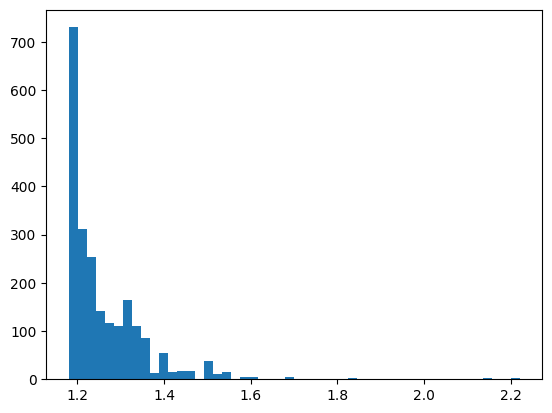

In [82]:
df = dcdf
field= 'COSMOS'
filt = 'g'
rb_thr = 0.6

subdf = df[(df['field'] == field) & (df['object filter'] == filt) & 
            (df['object real/bogus score'] > rb_thr)]

plt.hist(subdf['airmass'], bins=50);

### Try generating a fake flare dataset:

In [ ]:
np.random.seed(111)

nstars = 1000
nflares = 100
narr = []
t1 = Time(59295.0, format='mjd')
t2 = Time(59295.0 + (1/24), format = 'mjd') 
site = EarthLocation.of_site('Cerro Tololo')

dec1 = np.random.uniform(-1.5,1.5,nstars)
ra1 = np.random.uniform(0,3,nstars)
flux1 = np.random.normal(20, 0.4, nstars)

ra2 = ra1 + np.random.normal(0,(1/3600),nstars)
dec2 = dec1 + np.random.normal(0,(1/3600),nstars)
flux2 = flux1 + np.random.normal(0,0.1,nstars)
#keep above in notebook^^^^
#Make function of below:
pa1 = celest_to_pa(ra1, dec1, t1, site)
pa2 = celest_to_pa(ra2, dec2, t2, site)
approx_pa = np.mean([pa1.mean(), pa2.mean()])

#flare deltas
for n in np.random.choice(range(nstars), nflares, replace=False):
    ra2[n] += (10/3600) * np.cos(approx_pa)
    dec2[n] += (10/3600) * np.sin(approx_pa)
    flux2[n] -= 0.5
    narr.append(n)

dra = ra2 - ra1
ddec = dec2 - dec1
dpa = pa2 - pa1

d = np.sqrt(dra**2 + ddec**2) * np.cos(90 - approx_pa + np.arctan(ddec/dra)) # scalar projection along PA

plt.scatter(ra1,dec1,s=10)
plt.scatter(ra2,dec2,s=10)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.show()

plt.hist2d(ra2 - ra1, dec2 - dec1, bins=20)
plt.xlabel('dRA')
plt.ylabel('dDec')
plt.show()

plt.hist(dpa, bins=20)
plt.xlabel('dPA')
print(dpa.mean())
plt.show()

plt.hist(d, bins=20)
plt.xlabel('d')
print(d.mean())

In [ ]:
fig = plt.figure(figsize=(6,6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                left=0.1, right=0.9, bottom=0.1, top=0.9,
                wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

mdiff_arr = flux2 - flux1
xdiff_arr = d

scatter_hist(mdiff_arr, xdiff_arr, ax, ax_histx, ax_histy)

ax.axhline(0, color='k', ls='--', alpha=0.5)
ax.axvline(0, color='k', ls='--', alpha=0.5)

ax.grid(False)
ax_histx.grid(False)
ax_histy.grid(False)

ax.tick_params(axis='both', labelsize=10)
ax_histx.tick_params(axis='both', labelsize=10)
ax_histy.tick_params(axis='both', labelsize=10)

ax.set_ylabel(r'd (deg)$\quad Bluer\rightarrow$')
ax.set_xlabel(r'$\leftarrow Brighter\quad\Delta$g (mag)')
ax_histx.set_title('{0}/{1} flare fraction'.format(nflares,nstars));

In [ ]:
for i,time in enumerate(np.arange(dcdf['object MJD'].min(), dcdf['object MJD'].min()+120,20)):
    print(time)
    alts = []
    for t in np.arange(-12,12,1):

        alt = SkyCoord(ra=10.008366666666667, dec=2.210777777777778, unit=(u.hour,u.deg)).transform_to(
        AltAz(obstime=Time(np.floor(time) + t/24, format='mjd'), location=EarthLocation.of_site('Cerro Tololo'))).alt.value
        alts.append(alt)
    plt.plot(np.arange(-12,12,1), alts, label='night={}'.format(0+20*i))
    plt.title('COSMOS altitude')
    plt.ylabel('Alt (deg)')
    plt.xlabel('Hours from midnight')
    plt.legend(fontsize=9)

In [ ]:
slope_thresh = 0.2 / 0.5  #-0.2 magnitude change over 1/2 hour

In [ ]:
def dcoord2(df, field, rb_thr, s_thr, filt):

        """
        Creates delta-RA vs. delta-dec plot, comparing pairs of epochs with the most negative
        dmag/dt slope for each candidate ID. 

        Parameters
        ----------
        df : pandas dataframe
                input dataframe

        field : str
                DECAM field ('ELAIS' or 'COSMOS')

        rb_thr : float
                real/bogus score threshold. No candidate with a R/B 
                score below rb_thr will be plotted

        s_thr : float
                dmag/dt threshold

        filt : str
                DECAM filter
        """

        d_ra = np.zeros_like(df[df['field'] == field]['candidate id'].unique())
        d_dec = np.zeros_like(df[df['field'] == field]['candidate id'].unique())
        d_am = np.zeros_like(df[df['field'] == field]['candidate id'].unique())
        slopes = np.zeros_like(df[df['field'] == field]['candidate id'].unique())

        for i,id in enumerate(df[df['field'] == field]['candidate id'].unique()):

                subdf = df[(df['field'] == field) & (df['object filter'] == filt) & 
                             (df['object real/bogus score'] > rb_thr) & (df['candidate id'] == id)]

                if subdf.shape[0] > 1:
                        slope = np.diff(subdf['object magnitude'].values) / np.diff(subdf['object MJD'].values * 24)
                        high_rate = np.where((np.abs(slope) > s_thr) & (np.abs(slope) == np.abs(slope).max()))[0]

                        if len(high_rate) > 0:
                                slopes[i] = slope[high_rate][0]
                                d_ra[i] = subdf['object ra'].values[high_rate + 1] - subdf['object ra'].values[high_rate]
                                d_dec[i] = subdf['object dec'].values[high_rate + 1] - subdf['object dec'].values[high_rate]
                                d_am[i] = np.mean([subdf['airmass'].values[high_rate + 1], subdf['airmass'].values[high_rate]])
                        else:   
                                slopes[i] = np.nan
                                d_ra[i] = np.nan
                                d_dec[i] = np.nan
                                d_am[i] = np.nan
                else:
                        slopes[i] = np.nan
                        d_ra[i] = np.nan
                        d_dec[i] = np.nan
                        d_am[i] = np.nan

        pltslopes = (slopes.astype(float) * -1) * 40  #change sign, dtype and scale for plotting
        x = d_ra * 3600
        y = d_dec * 3600
        
        fig = plt.figure(figsize=(12,8))
        ax = plt.axes()
        s = ax.scatter(x, y, c=d_am, s=pltslopes, alpha=0.5)
        xabs_max = abs(np.nanmax(ax.get_xlim()))
        yabs_max = abs(np.nanmax(ax.get_ylim()))
        ax.set_xlim(-xabs_max, xabs_max)
        ax.set_ylim(-yabs_max , yabs_max)
        ax.set_xlabel(r'$\Delta$ RA (arcsec)')
        ax.set_ylabel(r'$\Delta$ Dec (arcsec)')
        ax.set_title('{0} {1}-band, r/b score > {2}, |dmag/dt| > {3:0.2f} mags/hr'.format(field, filt, rb_thr, s_thr))
        cbar = fig.colorbar(s)
        cbar.set_label('(Mean) Airmass', rotation=270, labelpad=20)
        plt.savefig('Figures/dcoord2.png', dpi=500, bbox_inches='tight')

dcoord2(dcdf, 'COSMOS', rb_thr=0.6, s_thr=slope_thresh, filt='g')